In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
data=pd.read_csv("C:/Users/Jay/Downloads/credit_card/creditcard.csv")


In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
fraud=data.loc[data['Class']==1]
normal=data.loc[data['Class']==0]

In [23]:
fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [24]:
fraud.sum()

Time      3.972743e+07
V1       -2.347799e+03
V2        1.782899e+03
V3       -3.460374e+03
V4        2.234678e+03
V5       -1.550403e+03
V6       -6.876865e+02
V7       -2.739816e+03
V8        2.807529e+02
V9       -1.269912e+03
V10      -2.793026e+03
V11       1.869685e+03
V12      -3.079621e+03
V13      -5.379224e+01
V14      -3.430088e+03
V15      -4.572094e+01
V16      -2.036853e+03
V17      -3.279592e+03
V18      -1.105184e+03
V19       3.348844e+02
V20       1.831811e+02
V21       3.510855e+02
V22       6.912050e+00
V23      -1.983152e+01
V24      -5.172411e+01
V25       2.039285e+01
V26       2.541088e+01
V27       8.392280e+01
V28       3.722831e+01
Amount    6.012797e+04
Class     4.920000e+02
dtype: float64

In [25]:
len(fraud)

492

In [26]:
len(normal)

284315

**Understanding the relationship between variables***

Since the fraudlength transactions are very less (492 to be precise) we can barely even see yellow dots as compared to normal transactions

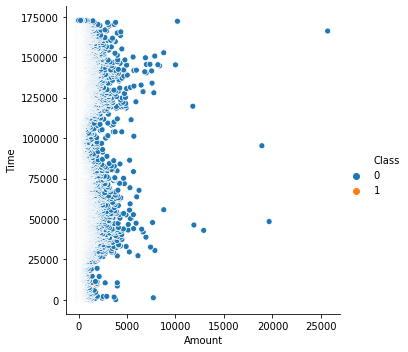

In [32]:
sns.relplot(x='Amount' , y="Time",hue="Class",data=data)

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [36]:
x=data.iloc[:,:-1]
y=data['Class']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [39]:
clf=linear_model.LogisticRegression(C=1e5)

In [40]:
clf.fit(x_train,y_train)

C:\Uchiha\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Using the prediction method

In [42]:
y_pred=np.array(clf.predict(x_test))
y=np.array(y_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [44]:
print(confusion_matrix(y_test,y_pred))

[[85249    27]
 [   64   103]]


Checking its accuracy

In [45]:
print(accuracy_score(y_test,y_pred))

0.998934962489613


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85276
           1       0.79      0.62      0.69       167

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Even though it was a imbalanced data the frauds can be detected smoothly.
Take a value from the ds and try it 